In [21]:
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
from NV import *

Phi: 98.349934 +/- 0.492530
Theta: 62.594317 or +/- 0.624690
Phi(naive): 100.112000
Theta(naive): 68.661372


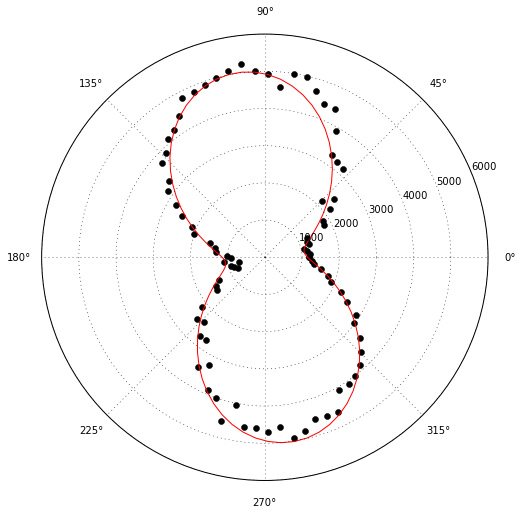

In [2]:
T1 = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\10-31-16\MNP on CPW 0.5mW scan 5 ODMR x150 y41 rotor sweep')
T1[:,1] -= 1238
OrientPol(T1,False)

[  9.87426301e+00   1.16837796e-02  -2.66211496e-01   3.33808347e+02
   1.00668360e+02]
(1.6617709943343684, 10.0)


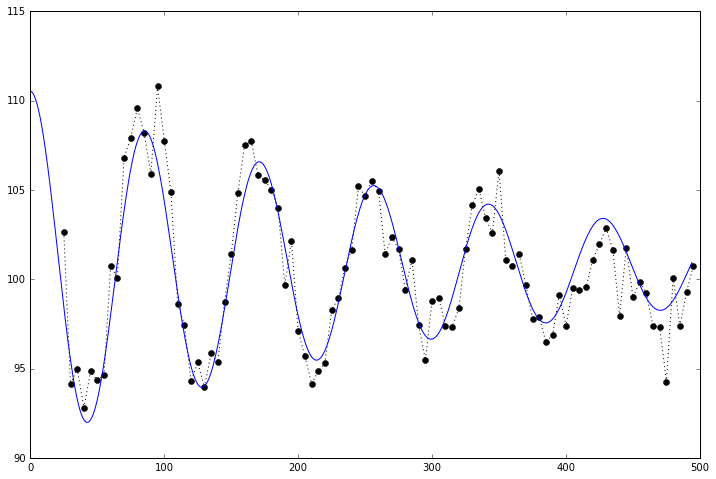

In [8]:

def EPR_NoRef(EPRfiles,Pfiles):
    pseq = np.loadtxt(Pfiles)
    files = glob.glob(EPRfiles)
    d_sum = np.zeros((pseq.shape[0],))
    l = pseq.shape[0]
    for f in files:
        epr = np.loadtxt(f)
        diff = epr[:,0]
        diff = np.nan_to_num(diff)
        diff.resize(((diff.shape[0] - (diff.shape[0] % l)),1))
        diff = np.reshape(diff,(pseq.shape[0],-1),order='F')
        d_sum += np.sum(diff,axis=1)
        
    return pseq,d_sum

time,rabi0 = EPR_NoRef(r'C:\Users\Ouyang Group\Documents\Data\10-31-16\MNP on CPW 5mW scan 5 x150 y41 B0.5V T98 X-0.5 Y3.76 2 Rabi *[0-9]',
              r'C:\Users\Ouyang Group\Documents\Data\10-31-16\MNP on CPW 5mW scan 5 x150 y41 B0.5V T98 X-0.5 Y3.76 2 Rabi Pulse Seq')
rabi0 = 100*rabi0/np.mean(rabi0)
opt0,cov0 = curve_fit(RabiFit,time[1:],rabi0[1:],maxfev=5500,p0=(600,10E-3,0,200,9000))
t = np.arange(0,np.max(time),1)
plt.plot(time[1:],rabi0[1:],'ko:')
plt.plot(t,RabiFit(t,*opt0),'b-')
print opt0
print (np.std(rabi0[1:]-RabiFit(time[1:],*opt0)),np.sqrt(np.mean(rabi0)))

[   975.08074776    654.04223477  15389.23648225]
(15339.622448979591, 0.0080740728709082412, 0.0070268731225673429)


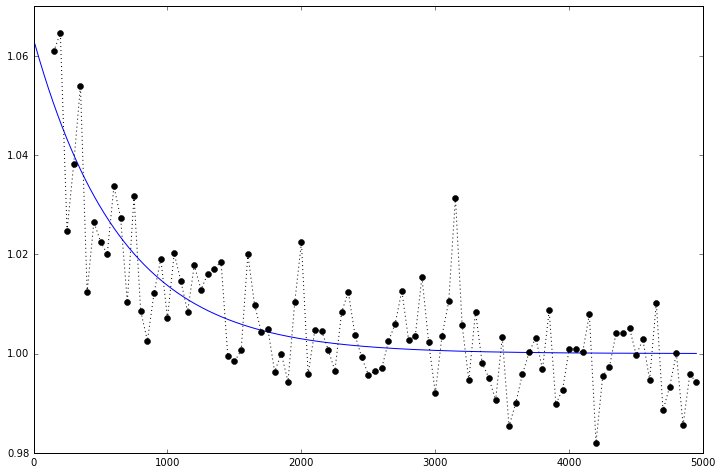

In [9]:
def T2Fit(t,C,tau,D):
    return C*np.exp(-t/tau)+D


time,hahn1 = EPR_NoRef(r'C:\Users\Ouyang Group\Documents\Data\10-31-16\MNP on CPW 5mW scan 5 x150 y41 B0.5V T98 X-0.5 Y3.76 2 hahn *[0-9]',
              r'C:\Users\Ouyang Group\Documents\Data\10-31-16\MNP on CPW 5mW scan 5 x150 y41 B0.5V T98 X-0.5 Y3.76 2 hahn Pulse Seq')
#hahn0 = hahn0-np.min(hahn0)
opt0,cov0 = curve_fit(T2Fit,time[1:],hahn1[1:],maxfev=5500,p0=(10000,1600,-np.min(hahn1)))
t = np.arange(10,np.max(time),1)
plt.plot(t,T2Fit(t,*opt0)/opt0[2],'b-')
plt.plot(time[1:],hahn1[1:]/opt0[2],'ko:')
print opt0
print (np.mean(hahn1),1/np.sqrt(np.mean(hahn1)),np.std(hahn1[-20:])/np.mean(hahn1[-20:]))

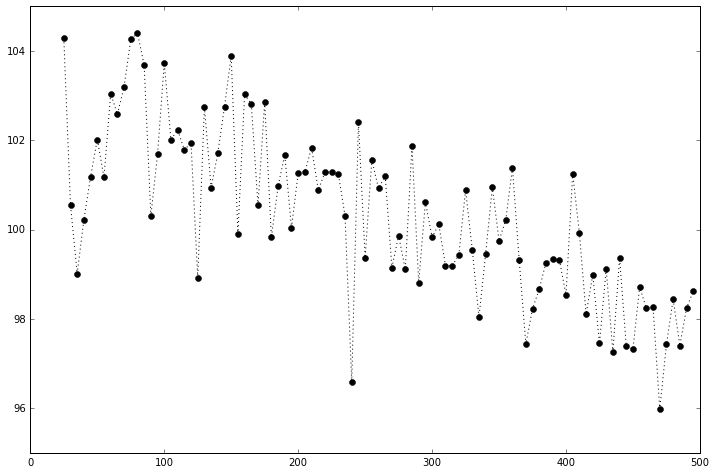

In [11]:
time,rabi0 = EPR_NoRef(r'C:\Users\Ouyang Group\Documents\Data\10-31-16\MNP on CPW 5mW scan 10 X127 Y63 B0.5V T0  rabi *[0-9]',
              r'C:\Users\Ouyang Group\Documents\Data\10-31-16\MNP on CPW 5mW scan 10 X127 Y63 B0.5V T0  rabi Pulse Seq')
rabi0 = 100*rabi0/np.mean(rabi0)
#opt0,cov0 = curve_fit(RabiFit,time[1:],rabi0[1:],maxfev=5500,p0=(600,10E-3,0,200,9000))
t = np.arange(0,np.max(time),1)
plt.plot(time[1:],rabi0[1:],'ko:')
#plt.plot(t,RabiFit(t,*opt0),'b-')
#print opt0
#print (np.std(rabi0[1:]-RabiFit(time[1:],*opt0)),np.sqrt(np.mean(rabi0)))

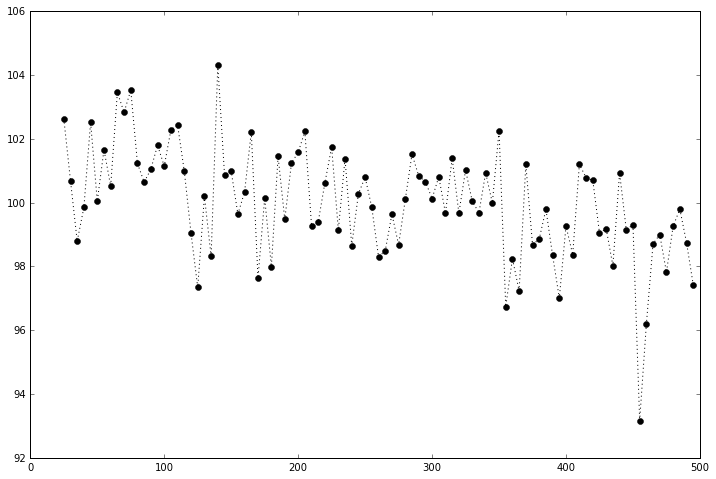

In [22]:
time,rabi0 = EPR_NoRef(r'C:\Users\Ouyang Group\Documents\Data\11-2-16\MNP 5 on CPW 5mW scan 2 x73 y115 B0.29V T0 rabi *[0-9]',
              r'C:\Users\Ouyang Group\Documents\Data\11-2-16\MNP 5 on CPW 5mW scan 2 x73 y115 B0.29V T0 rabi Pulse Seq')
rabi0 = 100*rabi0/np.mean(rabi0)
#opt0,cov0 = curve_fit(RabiFit,time[1:],rabi0[1:],maxfev=5500,p0=(600,10E-3,0,200,9000))
t = np.arange(0,np.max(time),1)
plt.plot(time[1:],rabi0[1:],'ko:')
#plt.plot(t,RabiFit(t,*opt0),'b-')
#print opt0
#print (np.std(rabi0[1:]-RabiFit(time[1:],*opt0)),np.sqrt(np.mean(rabi0)))